In [1]:
# Importing the Keras libraries and packages
from keras import models
from keras.models import Sequential, Model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.applications import inception_v3
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/allankim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/allankim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/allankim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/allankim/anaconda3/lib/python3.7/site-packag

In [2]:
#pre-processing images taken from keras documentation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'Images/DATASET/TRAIN',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(
    'Images/DATASET/TEST',
    target_size=(256, 256),
    batch_size=4,
    class_mode='binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [10]:
# imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False)
# imagenet_new=imagenet.output
# cnn2 = models.Sequential()
# cnn2.add(imagenet)
# cnn2.add(GlobalAveragePooling2D())
# cnn2.add(Dense(1024,activation='relu'))
# cnn2.add(Dropout(p = 0.1))
# cnn2.add(Dense(1024,activation='relu')) #dense layer 2
# cnn2.add(Dropout(p = 0.1))
# cnn2.add(Dense(512,activation='relu')) #dense layer 3
# cnn2.add(Dropout(p = 0.1))
# cnn2.add(Dense(1,activation='sigmoid')) #final layer with softmax activation

/home/allankim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  import sys
/home/allankim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  if __name__ == '__main__':
/home/allankim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  # This is added back by InteractiveShellApp.init_path()


In [15]:
from tensorflow.keras.applications import ResNet50
res = ResNet50(input_shape = (224, 224, 3), include_top = True, weights = 'imagenet')
model = models.Sequential()
model.add(res)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
102858752/102853048 [==============================] - 6s 0us/step


TypeError: The added layer must be an instance of class Layer. Found: <tensorflow.python.keras.engine.training.Model object at 0x7fa53a402b00>

In [11]:
for layer in cnn2.layers[:1]:
    layer.trainable=False

In [12]:
cnn2.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

# # step_size_train=train_generator.n//train_generator.batch_size
# new_model.fit(X_train,
#           y_train,
#           epochs=100,
#           validation_data=(X_test, y_test))

In [6]:
# # Initialising the CNN
# classifier = Sequential()

# # Convolution
# classifier.add(Conv2D(32, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

# # Pooling
# classifier.add(MaxPooling2D(pool_size = (2, 2)))


# classifier.add(Conv2D(32, (3, 3)))
# classifier.add(Activation('relu'))
# classifier.add(MaxPooling2D(pool_size=(2, 2)))
# classifier.add(Dropout(0.25))

# classifier.add(Conv2D(64, (3, 3), padding='same'))
# classifier.add(Activation('relu'))
# classifier.add(Conv2D(64, (3, 3)))
# classifier.add(Activation('relu'))
# classifier.add(MaxPooling2D(pool_size=(2, 2)))
# classifier.add(Dropout(0.25))

# classifier.add(Flatten())
# classifier.add(Dense(512))
# classifier.add(Activation('relu'))
# classifier.add(Dropout(0.5))
# classifier.add(Dense(1))
# classifier.add(Activation('sigmoid'))



# # Adding a second convolutional layer
# # classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# # classifier.add(MaxPooling2D(pool_size = (2, 2)))

# # # Adding a second convolutional layer
# # classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# # classifier.add(MaxPooling2D(pool_size = (2, 2)))

# # # Flattening the classifier
# # classifier.add(Flatten())

# # # Connecting all layer
# # classifier.add(Dense(units = 128, activation = 'relu'))
# # classifier.add(Dense(units = 1, activation = 'sigmoid'))

# # Compiling the classifier
# classifier.compile(optimizer = 'adam',
#                   loss = 'binary_crossentropy',
#                   metrics = ['accuracy'])

In [13]:
class1 = cnn2.fit(
    training_set,
    epochs=30,
    validation_data=test_set)

Epoch 1/30
22564/22564 [==============================] - 473s 21ms/step - loss: 0.6908 - accuracy: 0.5562 - val_loss: 0.6394 - val_accuracy: 0.5607
Epoch 2/30
22564/22564 [==============================] - 472s 21ms/step - loss: 0.6870 - accuracy: 0.5569 - val_loss: 0.5891 - val_accuracy: 0.5575
Epoch 3/30
22564/22564 [==============================] - 472s 21ms/step - loss: 0.6871 - accuracy: 0.5569 - val_loss: 0.5330 - val_accuracy: 0.5575
Epoch 4/30
22564/22564 [==============================] - 472s 21ms/step - loss: 0.6869 - accuracy: 0.5569 - val_loss: 0.5894 - val_accuracy: 0.5575
Epoch 5/30
22564/22564 [==============================] - 472s 21ms/step - loss: 0.6886 - accuracy: 0.5569 - val_loss: 0.6038 - val_accuracy: 0.5575
Epoch 6/30
22564/22564 [==============================] - 472s 21ms/step - loss: 0.6868 - accuracy: 0.5569 - val_loss: 0.6152 - val_accuracy: 0.5575
Epoch 7/30
22564/22564 [==============================] - 473s 21ms/step - loss: 0.6868 - accuracy: 0.5569

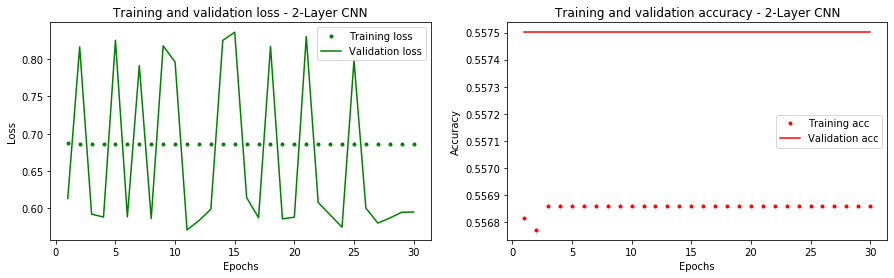

In [9]:
#Extracting CNN Results for Visualization
hist_cnn = class1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['accuracy'] 
val_acc_values = hist_cnn['val_accuracy']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Images/Model/cnn1.png')
plt.show()